# optimizing minimum creation range to preexisting tips
Tim Tyree<br>
7.8.2025

In [1]:
from lib.my_initialization import *

In [2]:
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# define module

In [18]:
# parse_iolines
def parse_iolines_single(input_fn, printing=False):
    n_input=-9999
    n_output=-9999
    with open(input_fn) as f:
#         trgt1='Printing Inputs...\n'
#         trgt2='Printing Outputs...\n'
        trgt1='Printing Inputs:\n'
        trgt2='Printing Outputs:\n'
        for n,line in enumerate(f):
            if trgt1 == line:
                if printing:
                    print(f'found inputs starting after line {n}')
                n_input=n
            if trgt2 == line:
                if printing:
                    print(f'found outputs starting after line {n}')
                n_output=n
    return n_input,n_output

def parse_outputs_single_trial(input_fn, n_output):
    """
    Example Usage:
TermTime = parse_outputs_single_trial(input_fn, n_output)
    """
    with open(input_fn) as f:
        for n,line in enumerate(f):
            if n == n_output+1:
                lin0 =line
                TermTime = eval(lin0[:-2].split('=')[-1])
                return TermTime
#         if n == n_output+1:
#             line_N = line
#         if n == n_output+2:
#             line_CollTime =line
# N_values=np.array([eval(s) for s in line_N[:-2].split(',')])
# CollTime_values=np.array([eval(s) for s in line_CollTime[:-2].split(',')])
# # CollTime_values=np.array([eval(s) for s in line_CollTime[:-1].split(',')])
# df=pd.DataFrame({
#     'N':N_values,
#     'CollTime':CollTime_values
# })
# df=df.loc[df.CollTime!=-9999]
# df.reset_index(inplace=True,drop=True)
## return df

# parse_outputs(input_fn, n_output=)
def parse_log_single(input_fn,printing=False):
    """
    Example Usage:
dict_data = parse_log_single(input_fn,printing=False)
    """
    n_input,n_output=parse_iolines_single(input_fn, printing=False)
    if n_input==-9999:
        if printing:
            print(f"Warning: n_input not found for input_fn={input_fn}.\nreturning None...")
        return None
    col_name_lst, col_value_lst=parse_inputs(input_fn,n_input,n_output,printing=printing)
    dict_inputs=dict(zip(col_name_lst,col_value_lst))
    TermTime = parse_outputs_single_trial(input_fn, n_output)
    dict_data = dict(dict_inputs)
    dict_data['TermTime'] = TermTime
    return dict_data

# recall correct termination time target from the cardiac models

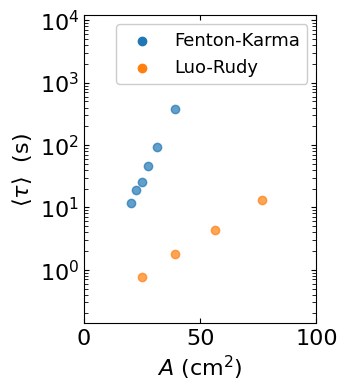

(0.0, 100.0, 0.13850549065122997, 12000.0)

In [3]:
data_folder = f"{nb_dir}/Data/full_results"
os.path.exists(data_folder)



Nbar_dir = os.path.join(data_folder,'Nbar_vs_A_full.csv')
taubar_dir = os.path.join(data_folder,'taubar_vs_A_full.csv')
df_Nbar = pd.read_csv(Nbar_dir)
df_taubar = pd.read_csv(taubar_dir)
# df_taubar
# df_Nbar



from scipy.optimize import dual_annealing
#only magnitude is to be varied
def comp_ss_err(x,*args):
    A_values,tau_values,powr,navg = args
    tau_pred_values = x * (2/A_values)**(powr) * np.exp(A_values*navg*powr/2)
    se = (tau_values-tau_pred_values) ** 2
    sse = np.sum(se)
    #return sse
    #smpe = np.sum(np.log(tau_pred_values/tau_values))
    smpe = np.mean( se / tau_values**2 )
    return smpe


xfk = df_taubar[df_taubar['model_name']=='FK']['A'].values
yfk = df_taubar[df_taubar['model_name']=='FK']['taubar'].values
xlr = df_taubar[df_taubar['model_name']=='LR']['A'].values
ylr = df_taubar[df_taubar['model_name']=='LR']['taubar'].values


# Mp = dict_fit_birth_fk['M']
# nup = dict_fit_birth_fk['m']
# Mm = dict_fit_death_fk['M']
# num = dict_fit_death_fk['m']
model_name='Fenton-Karma'
A_values = xfk
tau_values = yfk


# Mp = dict_fit_birth_lr['M']
# nup = dict_fit_birth_lr['m']
# Mm = dict_fit_death_lr['M']
# num = dict_fit_death_lr['m']
# model_name='Luo-Rudy'
# A_values = xlr
# tau_values = ylr

# #simulated annealing fit 
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# tau_pred_foo = lambda x: x * (2/A_values)**(powr) * np.exp(A_values*navg*powr/2)


#fk
# mag=2.033588801144e+00 ± 0.000000000000e+00
mag=2.0335888011441683
# res_again.x=array([2.0335888])
# # magfk=1.566390007127e+00 #± 3.762187006373e-09 #1e3 epochs
# # magfk=1.566390008379e+00 #± 5.014229476075e-09 #1e4 epochs
magfk = mag

maglr=9.319636219057e-01 #± 3.981174279133e-10 #1e3 epochs
maglr=9.319636257483e-01 #± 3.444428298138e-09 #1e4 epochs
maglr = mag


# Mp = dict_fit_birth_fk['M']
# nup = dict_fit_birth_fk['m']
# Mm = dict_fit_death_fk['M']
# num = dict_fit_death_fk['m']
model_name='Fenton-Karma'
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# yfk_pred = magfk * (2/xfk)**(powr) * np.exp(xfk*navg*powr/2)
# powrfk = float(powr)
# navgfk = float(navg)
# tau_pred_foofk = lambda x: float(magfk) * (2/x)**float(powrfk) * np.exp(x*float(navgfk*powrfk/2))


# Mp = dict_fit_birth_lr['M']
# nup = dict_fit_birth_lr['m']
# Mm = dict_fit_death_lr['M']
# num = dict_fit_death_lr['m']
model_name='Luo-Rudy'
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# ylr_pred = maglr * (2/xlr)**(powr) * np.exp(xlr*navg*powr/2)
# tau_pred_foolr = lambda x: float(maglr) * (2/x)**float(powr) * np.exp(x*float(navg*powr/2))


#plot the simulated annealing fits
figsize=(3,4)
fontsize=15
alpha=0.7
fig,ax=plt.subplots(figsize=figsize)
ax.scatter(xfk,yfk,c='C0',alpha=alpha,label='Fenton-Karma')
ax.scatter(xlr,ylr,c='C1',alpha=alpha,label='Luo-Rudy')
# # ax.scatter(xfk,yfk_pred,c='k',alpha=alpha,marker='+')#,label='Fenton-Karma')
# # ax.scatter(xlr,ylr_pred,c='k',alpha=alpha,marker='+')#,label='Luo-Rudy')
# # ax.scatter([A_fk],[tau_fk],marker='o',edgecolor='k',c='C0',#'k',
# #            alpha=1,label='Fenton-Karma')
# # ax.scatter([A_lr],[tau_lr],marker='o',edgecolor='k',c='C1',#c='k',
# #            alpha=1,label='Luo-Rudy')
# # xv=np.linspace(0,40,10)
# # ax.plot(xv,taubar0fk*np.exp(xv/A0fk),':',color='gray')#,'k--',lw=2)
# # xv=np.linspace(0,80,10)
# # ax.plot(xv,taubar0lr*np.exp(xv/A0lr),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,40,10)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foofk(xv),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foolr(xv),':',color='gray')#,'k--',lw=2)

ax.set_xticks([0,50,100,150])

# format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$\tau$  (s)',fontsize=16)
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$\langle\tau\rangle$  (s)',fontsize=16)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.tick_params(top=True, right=True,direction='in',which='minor',length=3)
# ax.set_ylim([1e-2,100])
# # AddLegend(ax=ax,xy=(-0.12,0.240),fontsize=fontsize-3)
leg = ax.legend(loc='upper right',fontsize=fontsize-2)#,alpha=1.)#,frameon=False,ncol=1)
# leg.set_alpha(1.)
# , edgecolor="black")
leg.get_frame().set_alpha(None)
# leg.get_frame().set_facecolor((1, 1, 1, 1))
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.set_ylim([0.31392551380514033, 4e9])
ax.set_xlim([0.,100])
ax.set_ylim([0.13850549065122997,12000])
# AddLege nd(ax=ax,xy=(0.05,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.7,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.4,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.1,0.25),fontsize=fontsize-3)
# ax.tick_params(axis='y', which='minor', left=True)
# plt.minorticks_on()
plt.show()
ax.axis()
#og src: http://localhost:8888/notebooks/Simulating%20the%20paired%20birth%20death%20process.ipynb


In [16]:
A = 25. # cm^2
tau_fk = yfk[np.around(xfk-A,5)==0][0]
tau_lr = ylr[np.around(xlr-A,5)==0][0]
print(f"{tau_fk=:.3f} s")
print(f"{tau_lr=:.3f} s")

tau_fk=25.598 s
tau_lr=0.769 s


# load run #50 results from cache to and quantify tau for each R_c_bar input value as dataframe

In [19]:
run_num = 50
# fldr = f"{nb_dir}/data/osg_output/run_44"
# fldr = f"{nb_dir}/data/osg_output/run_45"
# fldr = f"{nb_dir}/data/osg_output/run_46"
# fldr = f"{nb_dir}/data/osg_output/run_47"
fldr = f"{nb_dir}/data/osg_output/run_{run_num}"

In [20]:
assert os.path.exists(fldr)

In [21]:
dict_data_lst = []
for fn in os.listdir(fldr):
    if fn.find('.out.')!=-1:
        input_fn = os.path.join(fldr,fn)
        dict_data = parse_log_single(input_fn,printing=False)
        if dict_data is not None:
            #record
            dict_data_lst.append(dict_data)
df=pd.DataFrame(dict_data_lst); del dict_data_lst

In [24]:
np.random.seed(42)
printing=True
if printing:
    print(f"LPM with Same Creation Vs. R_c (Run #50):")
dict_lst = []
for (R_c_bar,D,L),g in df.groupby(by=['R_c_bar','D','L']):
    tau_values = g['TermTime'].values
    meanx,Delta_meanx,num_obs,p_normal=comp_mean_bootstrap_uncertainty(tau_values)
    printing=True
    a=g['varkappa'].max()
    chi=g['chi'].max()
    if printing:
        print(f"- {R_c_bar=:.2f}, {D=}, {L=}: mean tau: {meanx:.4f} +/- {Delta_meanx:.4f} seconds (N={num_obs}, {p_normal=:.4f})")
    dict_lst.append(dict(R_c_bar=R_c_bar,D=D,L=L,a=a,chi=chi,
                         tau=meanx,Delta_tau=Delta_meanx,
                         num_obs=num_obs,p_normal=p_normal,
                        ))

LPM with Same Creation Vs. R_c (Run #50):
- R_c_bar=0.00, D=0.115, L=5.0: mean tau: 9.8378 +/- 2.6112 seconds (N=1000, p_normal=0.0000)
- R_c_bar=0.01, D=0.115, L=5.0: mean tau: 10.2372 +/- 3.0871 seconds (N=1000, p_normal=0.0000)
- R_c_bar=0.02, D=0.115, L=5.0: mean tau: 9.1062 +/- 1.2039 seconds (N=1000, p_normal=0.0000)
- R_c_bar=0.03, D=0.115, L=5.0: mean tau: 9.7793 +/- 2.2165 seconds (N=1000, p_normal=0.0000)
- R_c_bar=0.04, D=0.115, L=5.0: mean tau: 9.6289 +/- 1.5370 seconds (N=1000, p_normal=0.0000)
- R_c_bar=0.05, D=0.115, L=5.0: mean tau: 9.1968 +/- 0.6005 seconds (N=1000, p_normal=0.4724)
- R_c_bar=0.06, D=0.115, L=5.0: mean tau: 9.1525 +/- 0.6129 seconds (N=1000, p_normal=0.4814)
- R_c_bar=0.07, D=0.115, L=5.0: mean tau: 8.8553 +/- 0.5555 seconds (N=1000, p_normal=0.9854)
- R_c_bar=0.08, D=0.115, L=5.0: mean tau: 14.8189 +/- 11.8602 seconds (N=1000, p_normal=0.0000)
- R_c_bar=0.09, D=0.115, L=5.0: mean tau: 9.1680 +/- 0.5898 seconds (N=1000, p_normal=0.2755)
- R_c_bar=0.10,

In [26]:
df_taubar = pd.DataFrame(dict_lst)
savedir = f"{nb_dir}/data/osg_output/run_{run_num}_tau_vs_R_c.csv"
df_taubar.to_csv(savedir,index=False)
print(savedir)
beep(3)

/Users/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_50_tau_vs_R_c.csv
-n 
-n 
-n 


0

# compute the squared error of tau versus R_c_bar and coarsely optimize R_c_bar for the Fenton-Karma model
Q: are any insignificantly different from target?

In [34]:
ibest = ((df_taubar['tau']-tau_fk) ** 2).argmin()
df_taubar.loc[ibest]

R_c_bar      5.900000e-01
D            1.150000e-01
L            5.000000e+00
a            1.552000e+00
chi          2.939433e+00
tau          2.551941e+01
Delta_tau    1.350978e+01
num_obs      1.000000e+03
p_normal     4.486029e-20
Name: 59, dtype: float64

In [79]:
R_c_bar_fk = df_taubar.loc[ibest,'R_c_bar']
print(f"{R_c_bar_fk=}")

R_c_bar_fk=0.59


# TODO: visualize the distribution of termination times at that setting

In [80]:
df[df['R_c_bar'] == R_c_bar_fk]['exit_code'].drop_duplicates()
df[df['R_c_bar'] == R_c_bar_fk].groupby('exit_code').describe()['seed']['count']

exit_code
-99      1.0
-1      39.0
 1     960.0
Name: count, dtype: float64

In [81]:
exit_code=-99
df[(df['R_c_bar'] == R_c_bar_fk)&(df['exit_code'] == exit_code)]['TermTime']

80142    6000.000009
Name: TermTime, dtype: float64

In [82]:
exit_code=-1
df[(df['R_c_bar'] == R_c_bar_fk)&(df['exit_code'] == exit_code)]['TermTime']

1709     0.96905
2474     0.26539
9056     0.36580
9609     0.15413
10775    0.08641
10869    0.29121
11504    0.23541
12441    0.64626
13772    0.07701
14776    0.18962
15452    0.05522
17505    0.08936
19397    0.05170
23543    0.23750
24932    0.27383
26435    0.40349
30372    0.24654
30393    0.26100
31747    0.07861
34977    0.24933
36993    0.98778
39461    0.03420
41255    0.06624
44600    0.10051
46295    0.12041
47043    1.56174
49145    0.25230
53353    0.66895
54356    0.20848
60969    0.26108
65378    0.12991
65971    0.77311
66009    1.26868
70255    0.06629
78676    0.12535
80345    0.68470
81402    0.15001
82513    0.04141
83181    1.06838
Name: TermTime, dtype: float64

In [83]:
exit_code=1
df[(df['R_c_bar'] == R_c_bar_fk)&(df['exit_code'] == exit_code)]['TermTime'].max()

2972.1170042245

In [84]:
#DONE: found at least one decent parameter setting.
#DONT(do only if none work): try run #50 again with run_faster.py (and the logger version) edited to explicitely not allow three removals in a single time step.

In [85]:
t_term_values_fk = df[df['R_c_bar'] == R_c_bar_fk]['TermTime'].values
mtt_lpm_fk,Delta_mtt_lpm_fk,num_obs,p_normal=comp_mean_bootstrap_uncertainty(t_term_values_fk)
num_obs,mtt_lpm_fk,Delta_mtt_lpm_fk

(1000, 25.519410379360618, 12.70977468186484)

In [86]:
# from scipy.stats import gamma

#compute xy values of histogram
# bins_fk=np.arange(0,50,1.6)
# bins_fk=np.arange(0,20,0.4)
bins_fk=np.arange(0,40,0.4)
bins_fk=np.arange(0,4000,4)
# bins_fk=np.arange(0,40,1)
#compute the histograms
barheights_fk,bins_fk = np.histogram(
    t_term_values_fk,
    bins=bins_fk,#10,
    range=None,
#     normed=None,
    weights=None,
    density=False,
)
t_term_fk=0.5*(bins_fk[1:]+bins_fk[:-1])
num_samples = t_term_values_fk.shape[0]
prob_fk = barheights_fk/(bins_fk[1:]-bins_fk[:-1])/num_samples

# # bins_lr=np.arange(0,16,0.4)
# bins_lr=np.arange(0,40,0.4)
# # bins_lr=np.arange(0,40,1)
# barheights_lr,bins_lr = np.histogram(
#     t_term_values_lr,
#     bins=bins_lr,#bins[bins<0.45],#10,
#     range=None,
# #     normed=None,
#     weights=None,
#     density=False,
# )
# t_term_lr=0.5*(bins_lr[1:]+bins_lr[:-1])
# num_samples = t_term_values_lr.shape[0]
# prob_lr = barheights_lr/(bins_lr[1:]-bins_lr[:-1])/num_samples
# # prob_fk = barheights_fk/num_samples
# # prob_lr = barheights_lr/num_samples

# #fit analytic functions to these distributions
# shpe_fk,loc_fk,scale_fk = gamma.fit(t_term_values_fk,method='MLE')
# shpe_lr,loc_lr,scale_lr = gamma.fit(t_term_values_lr,method='MLE')
#  # erlang.fit(t_term_values_fk),


# print(f"MLE fits of MTT: shape, loc, scale")
# print(f"Fenton-Karma: {shpe_fk:.4f},{loc_fk:.4f},{scale_fk:.4f}")
# print(f"Luo-Rudy: {shpe_lr:.4f},{loc_lr:.4f},{scale_lr:.4f}")

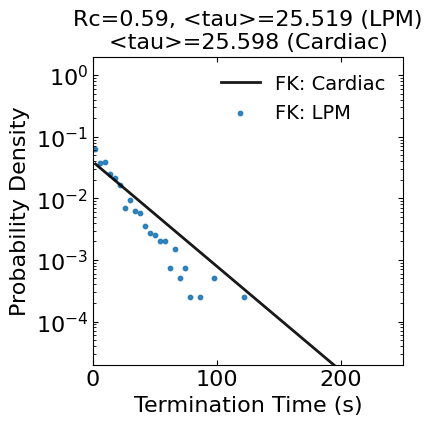

In [87]:
fig,ax=plt.subplots(figsize=(4,4))
fontsize=16
alpha=0.9
# xlim=[0,100]
# xlim=[0,20]
xlim=[0,40]
xlim=[0,250]
# #plot histograms
# bins = np.arange(0.,220.,1.6)
# ax.hist(t_term_values_fk,color='C0',alpha=alpha,density=True,bins=bins,stacked=True)#,label='Fenton-Karma')
# bins = np.arange(0.,220.,0.4)
# ax.hist(t_term_values_lr,color='C1',alpha=alpha,density=True,bins=bins,stacked=True)#,label='Luo-Rudy')


# # #plot line plot traces
# x = np.linspace(gamma.ppf(0.01, shpe_fk,loc=loc_fk,scale=scale_fk),
#                 gamma.ppf(0.99, shpe_fk,loc=loc_fk,scale=scale_fk), 100)
# # x = np.arange(0.1,40,0.4)
# ax.plot(x, gamma.pdf(x, shpe_fk,loc=loc_fk,scale=scale_fk),
#        'k-', lw=2, alpha=alpha, label='_MLE Fit')
# ax.plot(x, gamma.pdf(x, shpe_lr,loc=loc_lr,scale=scale_lr),
#        'k-', lw=2, alpha=alpha, label='MLE')

#plot line plot traces
ax.scatter(t_term_fk,prob_fk,color='C0',alpha=alpha,label='FK: LPM',s=10)
# ax.scatter(t_term_lr,prob_lr,color='C1',alpha=alpha,label='Luo-Rudy',s=10)

#plot MLE fit to the exponential distribution from the cardiac model
xv = t_term_fk.copy()
yv = np.exp(-xv/tau_fk)/tau_fk
ax.plot(xv, yv,
       'k-', lw=2, alpha=alpha, label='FK: Cardiac')


#format_plot
format_plot(ax=ax,xlabel='Termination Time (s)',ylabel='Probability Density',fontsize=fontsize)#,use_loglog=True)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xlim)
# ax.set_ylim((11*1.0178650359332904e-05, 80))
# ax.set_ylim((11*1.0178650359332904e-05, 8))
ax.set_ylim((2e-5, 2))
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.legend(fontsize=fontsize-2,frameon=False)
ax.set_title(f'Rc={R_c_bar_fk}, <tau>={mtt_lpm_fk:.3f} (LPM)\n<tau>={tau_fk:.3f} (Cardiac)', fontsize=fontsize)
plt.show()

# compare to the old fit

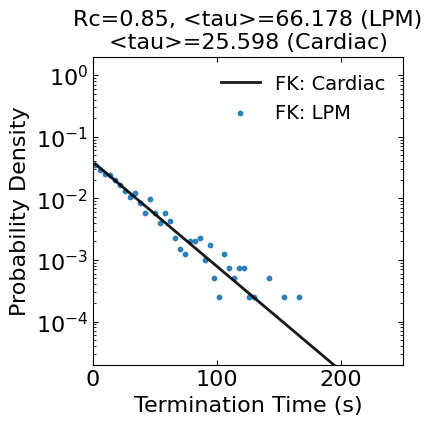

In [88]:
R_c_bar_fk = 0.85
t_term_values_fk = df[df['R_c_bar'] == R_c_bar_fk]['TermTime'].values
mtt_lpm_fk,Delta_mtt_lpm_fk,num_obs,p_normal=comp_mean_bootstrap_uncertainty(t_term_values_fk)
num_obs,mtt_lpm_fk,Delta_mtt_lpm_fk

# from scipy.stats import gamma

#compute xy values of histogram
# bins_fk=np.arange(0,50,1.6)
# bins_fk=np.arange(0,20,0.4)
bins_fk=np.arange(0,40,0.4)
bins_fk=np.arange(0,4000,4)
# bins_fk=np.arange(0,40,1)
#compute the histograms
barheights_fk,bins_fk = np.histogram(
    t_term_values_fk,
    bins=bins_fk,#10,
    range=None,
#     normed=None,
    weights=None,
    density=False,
)
t_term_fk=0.5*(bins_fk[1:]+bins_fk[:-1])
num_samples = t_term_values_fk.shape[0]
prob_fk = barheights_fk/(bins_fk[1:]-bins_fk[:-1])/num_samples

# # bins_lr=np.arange(0,16,0.4)
# bins_lr=np.arange(0,40,0.4)
# # bins_lr=np.arange(0,40,1)
# barheights_lr,bins_lr = np.histogram(
#     t_term_values_lr,
#     bins=bins_lr,#bins[bins<0.45],#10,
#     range=None,
# #     normed=None,
#     weights=None,
#     density=False,
# )
# t_term_lr=0.5*(bins_lr[1:]+bins_lr[:-1])
# num_samples = t_term_values_lr.shape[0]
# prob_lr = barheights_lr/(bins_lr[1:]-bins_lr[:-1])/num_samples
# # prob_fk = barheights_fk/num_samples
# # prob_lr = barheights_lr/num_samples

# #fit analytic functions to these distributions
# shpe_fk,loc_fk,scale_fk = gamma.fit(t_term_values_fk,method='MLE')
# shpe_lr,loc_lr,scale_lr = gamma.fit(t_term_values_lr,method='MLE')
#  # erlang.fit(t_term_values_fk),


# print(f"MLE fits of MTT: shape, loc, scale")
# print(f"Fenton-Karma: {shpe_fk:.4f},{loc_fk:.4f},{scale_fk:.4f}")
# print(f"Luo-Rudy: {shpe_lr:.4f},{loc_lr:.4f},{scale_lr:.4f}")

fig,ax=plt.subplots(figsize=(4,4))
fontsize=16
alpha=0.9
# xlim=[0,100]
# xlim=[0,20]
xlim=[0,40]
xlim=[0,250]
# #plot histograms
# bins = np.arange(0.,220.,1.6)
# ax.hist(t_term_values_fk,color='C0',alpha=alpha,density=True,bins=bins,stacked=True)#,label='Fenton-Karma')
# bins = np.arange(0.,220.,0.4)
# ax.hist(t_term_values_lr,color='C1',alpha=alpha,density=True,bins=bins,stacked=True)#,label='Luo-Rudy')


# # #plot line plot traces
# x = np.linspace(gamma.ppf(0.01, shpe_fk,loc=loc_fk,scale=scale_fk),
#                 gamma.ppf(0.99, shpe_fk,loc=loc_fk,scale=scale_fk), 100)
# # x = np.arange(0.1,40,0.4)
# ax.plot(x, gamma.pdf(x, shpe_fk,loc=loc_fk,scale=scale_fk),
#        'k-', lw=2, alpha=alpha, label='_MLE Fit')
# ax.plot(x, gamma.pdf(x, shpe_lr,loc=loc_lr,scale=scale_lr),
#        'k-', lw=2, alpha=alpha, label='MLE')

#plot line plot traces
ax.scatter(t_term_fk,prob_fk,color='C0',alpha=alpha,label='FK: LPM',s=10)
# ax.scatter(t_term_lr,prob_lr,color='C1',alpha=alpha,label='Luo-Rudy',s=10)

#plot MLE fit to the exponential distribution from the cardiac model
xv = t_term_fk.copy()
yv = np.exp(-xv/tau_fk)/tau_fk
ax.plot(xv, yv,
       'k-', lw=2, alpha=alpha, label='FK: Cardiac')


#format_plot
format_plot(ax=ax,xlabel='Termination Time (s)',ylabel='Probability Density',fontsize=fontsize)#,use_loglog=True)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xlim)
# ax.set_ylim((11*1.0178650359332904e-05, 80))
# ax.set_ylim((11*1.0178650359332904e-05, 8))
ax.set_ylim((2e-5, 2))
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.legend(fontsize=fontsize-2,frameon=False)
ax.set_title(f'Rc={R_c_bar_fk}, <tau>={mtt_lpm_fk:.3f} (LPM)\n<tau>={tau_fk:.3f} (Cardiac)', fontsize=fontsize)
plt.show()